# Formula One World Championship Analysis (2014-2021)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.facecolor'] = 'white' 

In [29]:
ct_stand=pd.read_csv("constructor_standings.csv")
ct=pd.read_csv("constructors.csv")
res=pd.read_csv("results.csv")
drv=pd.read_csv("drivers.csv")
races=pd.read_csv("races.csv")

## Team analysis

In [3]:
ct_stand_years=pd.merge(ct_stand,races[['raceId','year']], how='left')
ct_stand_years_rec=ct_stand_years[(ct_stand_years['year']>=2014) & (ct_stand_years['year']<=2021)]
ct_stand_years_names=pd.merge(ct_stand_years_rec,ct[['constructorId','name']], how='left')
ct_stand_years_names_unique=ct_stand_years_names.groupby('name')['year'].nunique()
ct_stand_years_names_unique=ct_stand_years_names_unique[ct_stand_years_names_unique==8].index

In [38]:
ct_stand_years_names_vets=ct_stand_years_names[ct_stand_years_names['name'].isin(ct_stand_years_names_unique)]
max_ids=[]
for ct in ct_stand_years_names_unique:
    max_id=ct_stand_years_names_vets[ct_stand_years_names_vets['name']==ct].groupby('year')['points'].idxmax()
    max_ids.extend(max_id)
counter=ct_stand_years_names_vets[ct_stand_years_names_vets['name']==ct].groupby('year')['raceId'].count()
ct_stand_years_names_vets_points=ct_stand_years_names_vets.loc[max_ids]

Text(0.5, 1.0, 'Total Points over 8 Years')

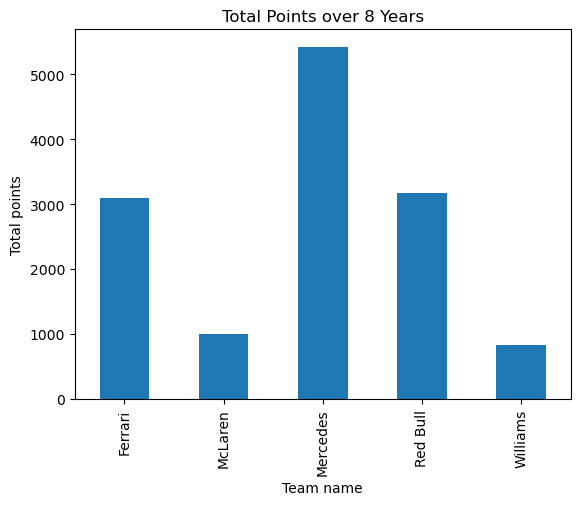

In [5]:
ct_stand_years_names_vets_total=ct_stand_years_names_vets_points.groupby('name')['points'].sum()
ct_stand_years_names_vets_total.plot(kind='bar')
plt.xlabel('Team name')
plt.ylabel('Total points')
plt.title('Total Points over 8 Years')

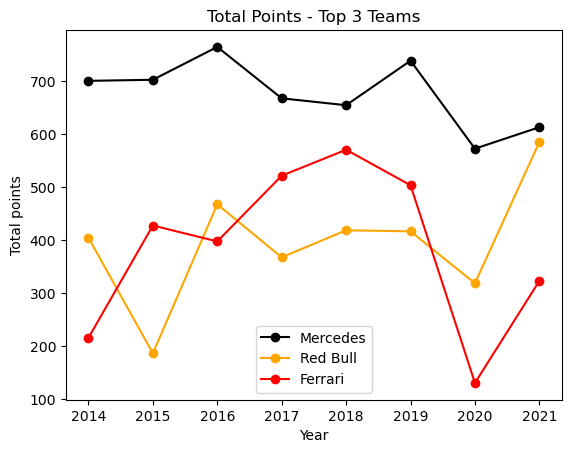

In [6]:
ct_stand_years_names_vets_points
ct_stand_years_names_vets_points_merc=ct_stand_years_names_vets_points[ct_stand_years_names_vets_points['name']=='Mercedes']
ct_stand_years_names_vets_points_ferr=ct_stand_years_names_vets_points[ct_stand_years_names_vets_points['name']=='Ferrari']
ct_stand_years_names_vets_points_RB=ct_stand_years_names_vets_points[ct_stand_years_names_vets_points['name']=='Red Bull']

plt.plot(ct_stand_years_names_vets_points_merc['year'],ct_stand_years_names_vets_points_merc['points'],marker='o',label='Mercedes',color='black')
plt.plot(ct_stand_years_names_vets_points_RB['year'],ct_stand_years_names_vets_points_RB['points'],marker='o',label='Red Bull',color='orange')
plt.plot(ct_stand_years_names_vets_points_ferr['year'],ct_stand_years_names_vets_points_ferr['points'],marker='o',label='Ferrari',color='red')
plt.ylabel('Total points')
plt.xlabel('Year')
plt.title('Total Points - Top 3 Teams')
plt.legend()

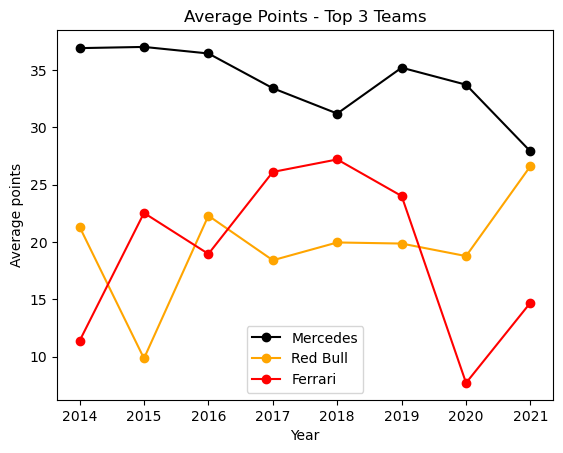

In [46]:
ct_stand_years_names_vets_points_avg=[]
ct_stand_years_names_vets_points_std=[]
teams=['Ferrari','Mercedes', 'Red Bull']
for ct in teams:
    ct_stand_years_names_vets_points_avg.extend([ct_stand_years_names_vets_points[ct_stand_years_names_vets_points['name']==ct].groupby('year')['points'].mean()])
plt.figure()
plt.plot(ct_stand_years_names_vets_points_avg[1].index,ct_stand_years_names_vets_points_avg[1]/counter,marker='o', label=teams[1],color='black')
plt.plot(ct_stand_years_names_vets_points_avg[2].index,ct_stand_years_names_vets_points_avg[2]/counter,marker='o', label=teams[2], color='orange')
plt.plot(ct_stand_years_names_vets_points_avg[0].index,ct_stand_years_names_vets_points_avg[0]/counter,marker='o', label=teams[0], color='red')
plt.xlabel('Year')
plt.ylabel('Average points')
plt.title('Average Points - Top 3 Teams')
plt.legend()

Text(0.5, 1.0, 'Cumulative Wins over 8 Years')

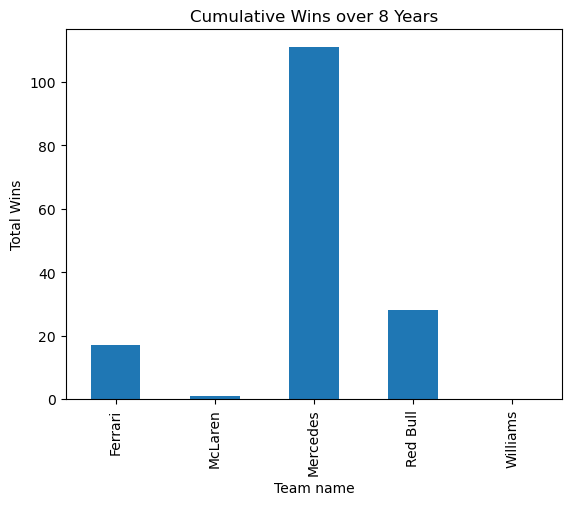

In [8]:
max_wins=[]
for ct in ct_stand_years_names_vets['name'].unique():
    max_w=ct_stand_years_names_vets[ct_stand_years_names_vets['name']==ct].groupby('year')['wins'].idxmax()
    max_wins.extend(max_w)
ct_stand_years_names_vets_wins=ct_stand_years_names_vets.loc[max_wins]

ct_stand_years_names_vets_wins_total=ct_stand_years_names_vets_wins.groupby('name')['wins'].sum()
ct_stand_years_names_vets_wins_total.plot(kind='bar')
plt.xlabel('Team name')
plt.ylabel('Total Wins')
plt.title('Cumulative Wins over 8 Years')

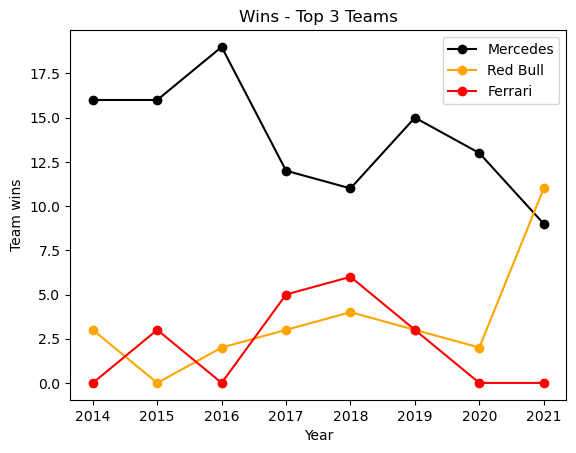

In [9]:
ct_stand_years_names_vets_wins
ct_stand_years_names_vets_wins_merc=ct_stand_years_names_vets_wins[ct_stand_years_names_vets_wins['name'] == 'Mercedes' ]
ct_stand_years_names_vets_wins_RB=ct_stand_years_names_vets_wins[ct_stand_years_names_vets_wins['name'] == 'Red Bull' ]
ct_stand_years_names_vets_wins_ferr=ct_stand_years_names_vets_wins[ct_stand_years_names_vets_wins['name'] == 'Ferrari' ]
plt.figure
plt.plot(ct_stand_years_names_vets_wins_merc['year'],ct_stand_years_names_vets_wins_merc['wins'],marker='o', label='Mercedes', color='black')
plt.plot(ct_stand_years_names_vets_wins_RB['year'],ct_stand_years_names_vets_wins_RB['wins'],marker='o', label='Red Bull', color='orange')
plt.plot(ct_stand_years_names_vets_wins_ferr['year'],ct_stand_years_names_vets_wins_ferr['wins'],marker='o', label='Ferrari', color='red')
plt.xlabel('Year')
plt.ylabel('Team wins')
plt.title('Wins - Top 3 Teams')
plt.legend()


## Driver Analysis

In [10]:
res=pd.read_csv("results.csv")
raceid=races[['year','raceId']]
res_year=pd.merge(res,raceid,how='left')
res_recent=res_year[(res_year['year']<=2021) & (res_year['year']>=2014)]

In [11]:
drv=pd.read_csv("drivers.csv")
res_recent_drv=pd.merge(res_recent,drv[['driverId','surname']],how='left')
res_recent_drv

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,surname
0,22130,900,3,131,6,3,1,1,1,25.0,57,1:32:58.710,5578710,19,1,1:32.478,206.436,1,2014,Rosberg
1,22131,900,825,1,20,4,2,2,2,18.0,57,+26.777,5605487,49,6,1:33.066,205.131,1,2014,Magnussen
2,22132,900,18,1,22,10,3,3,3,15.0,57,+30.027,5608737,39,5,1:32.917,205.460,1,2014,Button
3,22133,900,4,6,14,5,4,4,4,12.0,57,+35.284,5613994,57,7,1:33.186,204.867,1,2014,Alonso
4,22134,900,822,3,77,15,5,5,5,10.0,57,+47.639,5626349,56,3,1:32.616,206.128,1,2014,Bottas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,1:29.293,212.912,3,2021,Latifi
3263,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,1:29.442,212.557,6,2021,Giovinazzi
3264,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,1:30.647,209.732,6,2021,Russell
3265,25404,1073,8,51,7,18,\N,R,19,0.0,25,\N,\N,23,18,1:29.698,211.951,23,2021,Räikkönen


Text(0.5, 1.0, 'Average Driver Performance over 8 years')

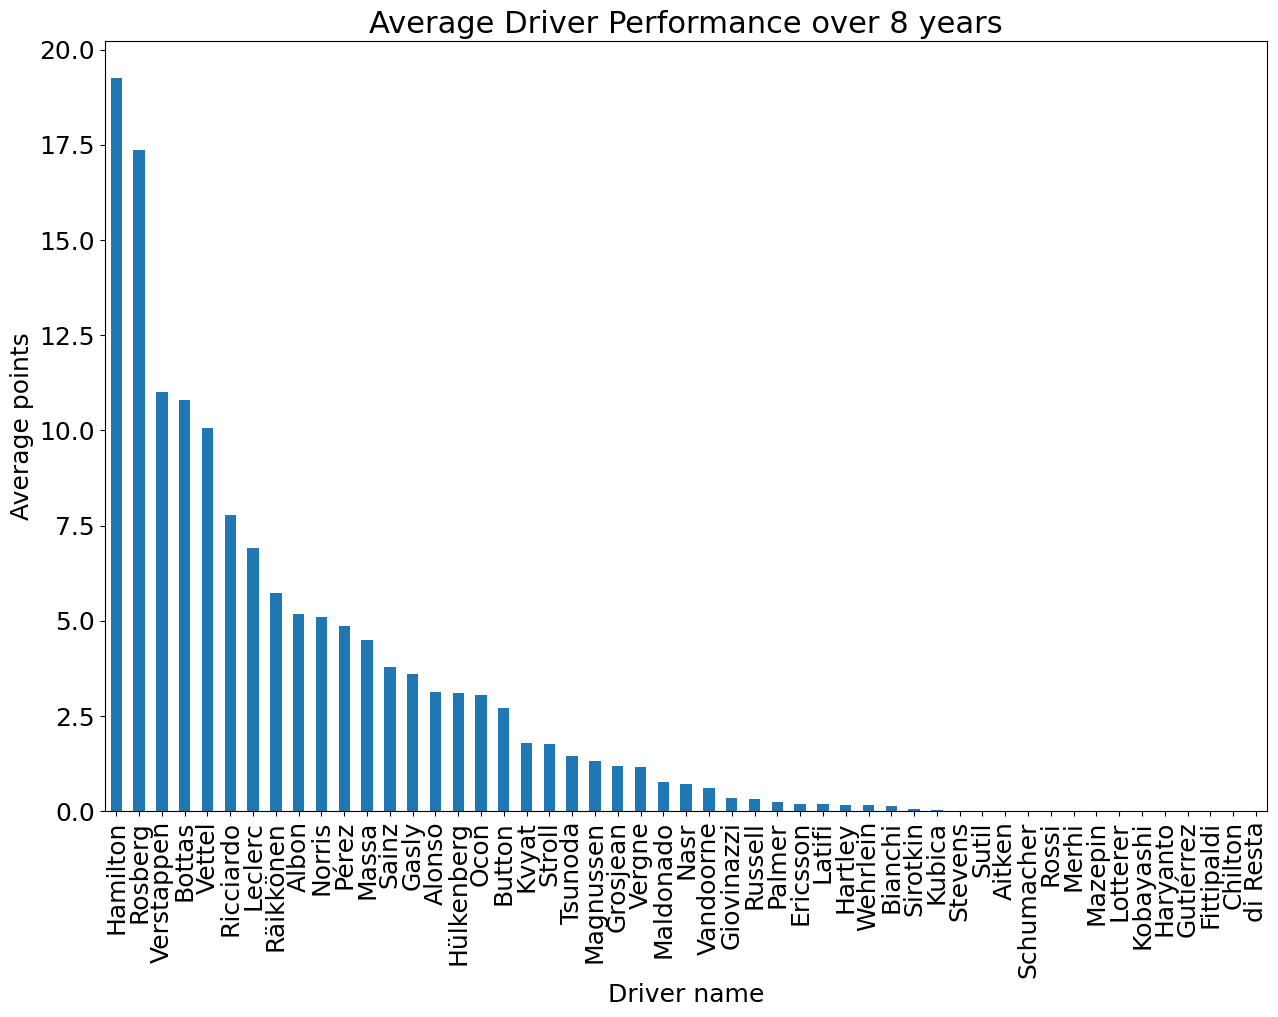

In [12]:
res_recent_drv_points_avg=res_recent_drv.groupby('surname')['points'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
res_recent_drv_points_avg.plot(kind='bar')
plt.xlabel('Driver name',fontsize=18)
plt.ylabel('Average points',fontsize=18)
plt.title('Average Driver Performance over 8 years',fontsize=22)

In [13]:
res_drv_top=res_recent_drv_points_avg.sort_values(ascending=False)[:5].index

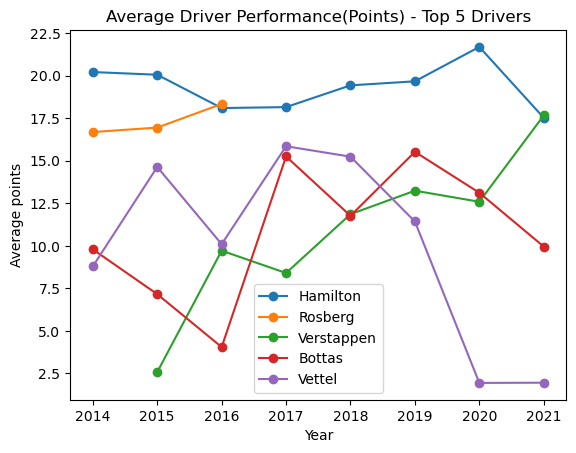

In [14]:
drivers_avg=[]
for dv in res_drv_top:
    drivers_avg.extend([res_recent_drv[res_recent_drv['surname']==dv].groupby('year')['points'].mean()])
    
plt.figure()
plt.plot(drivers_avg[0].index,drivers_avg[0], marker='o',label=res_drv_top[0])
plt.plot(drivers_avg[1].index,drivers_avg[1], marker='o',label=res_drv_top[1])
plt.plot(drivers_avg[2].index,drivers_avg[2], marker='o',label=res_drv_top[2])
plt.plot(drivers_avg[3].index,drivers_avg[3], marker='o',label=res_drv_top[3])
plt.plot(drivers_avg[4].index,drivers_avg[4], marker='o',label=res_drv_top[4])
plt.ylabel('Average points')
plt.xlabel('Year')
plt.title('Average Driver Performance(Points) - Top 5 Drivers')
plt.legend()

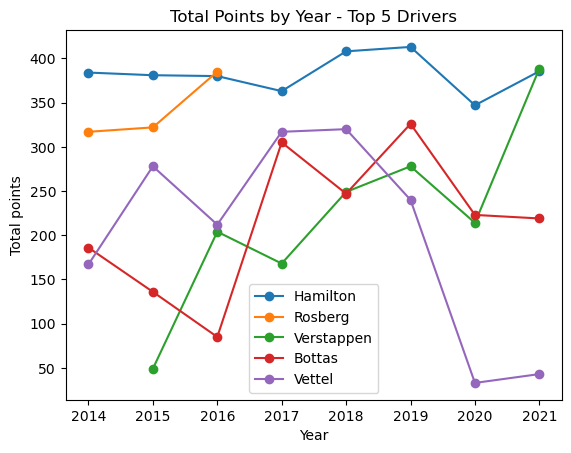

In [15]:
drivers=[]
for dv in res_drv_top:
    drivers.extend([res_recent_drv[res_recent_drv['surname']==dv].groupby('year')['points'].sum()])
    
plt.figure()
plt.plot(drivers[0].index,drivers[0], marker='o',label=res_drv_top[0])
plt.plot(drivers[1].index,drivers[1], marker='o',label=res_drv_top[1])
plt.plot(drivers[2].index,drivers[2], marker='o',label=res_drv_top[2])
plt.plot(drivers[3].index,drivers[3], marker='o',label=res_drv_top[3])
plt.plot(drivers[4].index,drivers[4], marker='o',label=res_drv_top[4])
plt.ylabel('Total points')
plt.xlabel('Year')
plt.title('Total Points by Year - Top 5 Drivers')
plt.legend()

In [16]:
res_recent_drv['rank']=res_recent_drv['rank'].astype(int)
res_recent_drv=res_recent_drv[res_recent_drv['rank']!=0]

Text(0.5, 1.0, 'Average Driver Ranking over 8 Years')

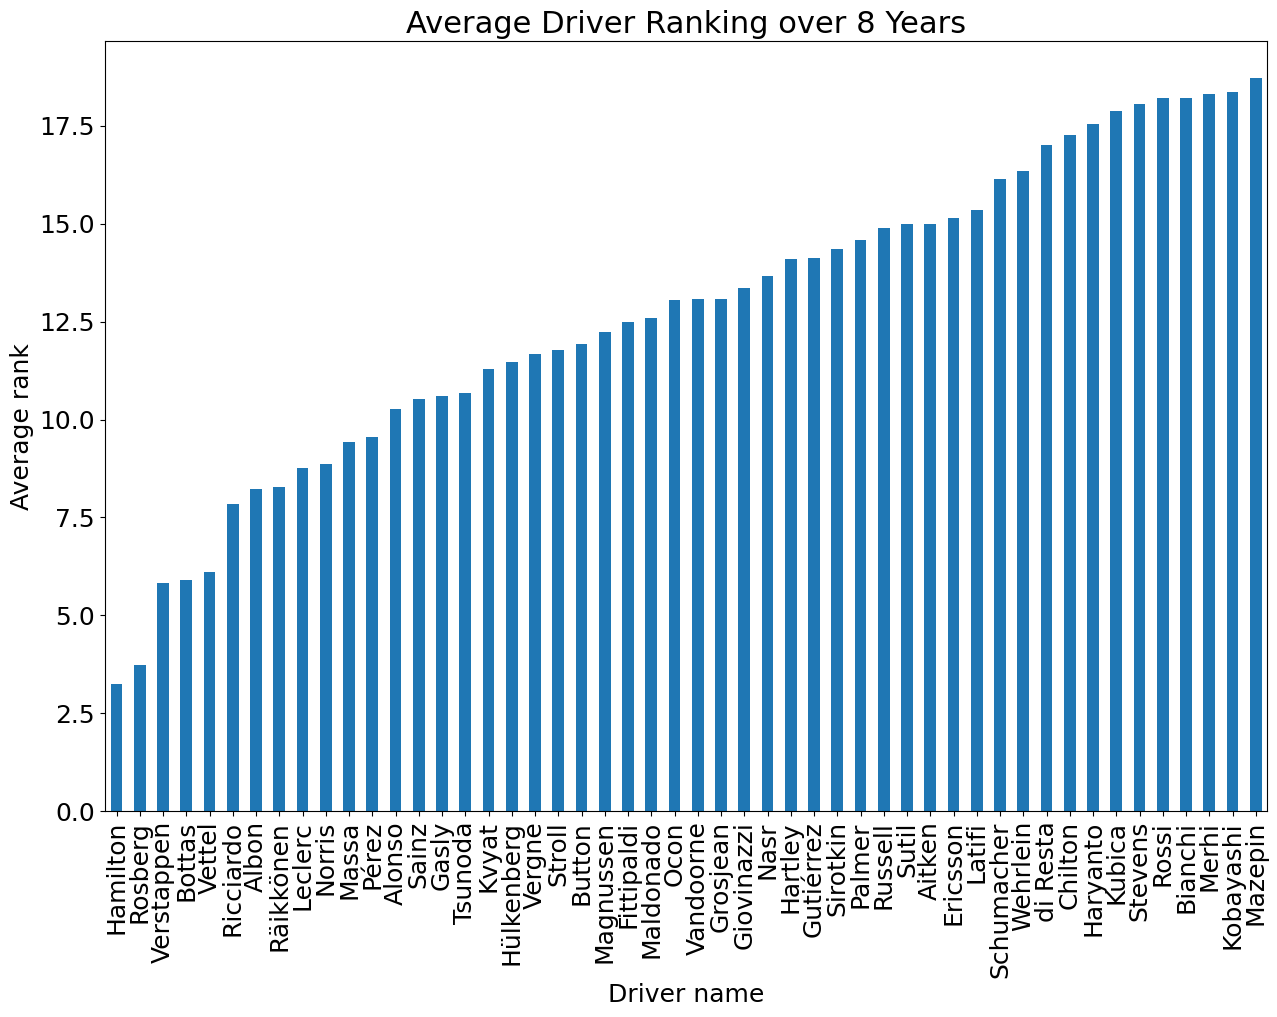

In [17]:
res_drv_rnkavg=res_recent_drv.groupby('surname')['rank'].mean().sort_values()
plt.figure(figsize=(15,10))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Average rank',fontsize=18)

res_drv_rnkavg.plot(kind='bar')
plt.xlabel('Driver name',fontsize=18)
plt.title('Average Driver Ranking over 8 Years', fontsize=22)

In [18]:
drivers_rank=[]
for dv in res_drv_top:
    drivers_rank.extend([res_recent_drv[res_recent_drv['surname']==dv].groupby('year')['rank'].mean()])

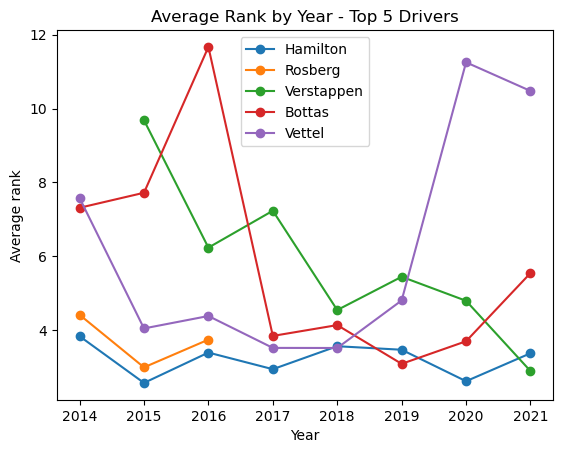

In [19]:
plt.figure()
plt.plot(drivers_rank[0].index,drivers_rank[0], marker='o',label=res_drv_top[0])
plt.plot(drivers_rank[1].index,drivers_rank[1], marker='o',label=res_drv_top[1])
plt.plot(drivers_rank[2].index,drivers_rank[2], marker='o',label=res_drv_top[2])
plt.plot(drivers_rank[3].index,drivers_rank[3], marker='o',label=res_drv_top[3])
plt.plot(drivers_rank[4].index,drivers_rank[4], marker='o',label=res_drv_top[4])
plt.ylabel('Average rank')
plt.xlabel('Year')
plt.title('Average Rank by Year - Top 5 Drivers')
plt.legend()

In [20]:
res_drv_wins=res_recent_drv[res_recent_drv['position']=='1']
res_drv_wins['position']=res_drv_wins['position'].astype(int)

C:\Users\crist\AppData\Local\Temp\ipykernel_17476\1983564948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_drv_wins['position']=res_drv_wins['position'].astype(int)


Text(0.5, 1.0, 'Total Wins over 8 Years')

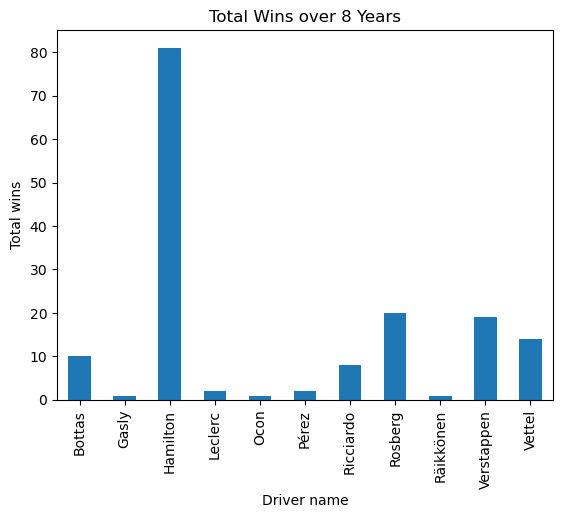

In [21]:
res_drv_wins_total=res_drv_wins.groupby('surname')['position'].sum()
res_drv_wins_total.plot(kind='bar')
plt.xlabel('Driver name')
plt.ylabel('Total wins')
plt.title('Total Wins over 8 Years')

In [22]:
drivers_wins=[]
for dv in res_drv_top:
    drivers_wins.extend([res_drv_wins[res_drv_wins['surname']==dv].groupby('year')['position'].sum()])

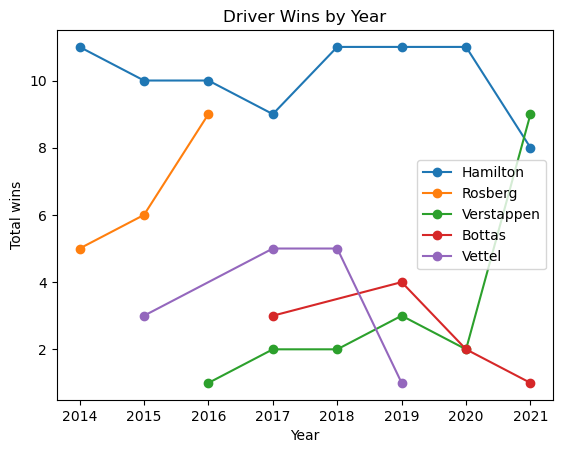

In [23]:
plt.figure()
plt.plot(drivers_wins[0].index,drivers_wins[0], marker='o',label=res_drv_top[0])
plt.plot(drivers_wins[1].index,drivers_wins[1], marker='o',label=res_drv_top[1])
plt.plot(drivers_wins[2].index,drivers_wins[2], marker='o',label=res_drv_top[2])
plt.plot(drivers_wins[3].index,drivers_wins[3], marker='o',label=res_drv_top[3])
plt.plot(drivers_wins[4].index,drivers_wins[4], marker='o',label=res_drv_top[4])
plt.xlabel('Year')
plt.ylabel('Total wins')
plt.title('Driver Wins by Year')
plt.legend(loc='center right')

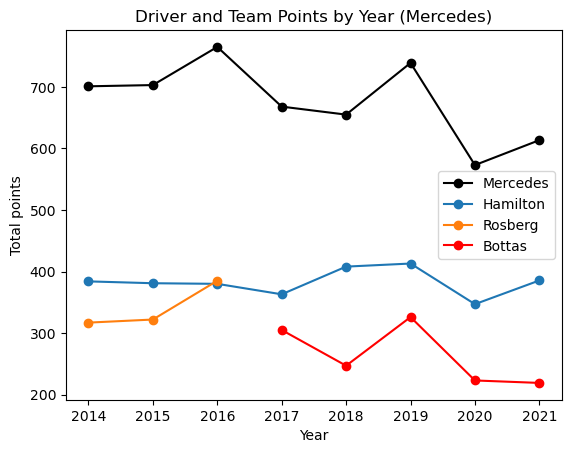

In [24]:
plt.figure
plt.plot(ct_stand_years_names_vets_points_merc['year'],ct_stand_years_names_vets_points_merc['points'],marker='o',label='Mercedes',color='black')
plt.plot(drivers[0].index,drivers[0], marker='o',label=res_drv_top[0])
plt.plot(drivers[1].index,drivers[1], marker='o',label=res_drv_top[1])
plt.plot(drivers[3].index[3:],drivers[3][3:], marker='o',label=res_drv_top[3], color='red')
plt.xlabel('Year')
plt.ylabel('Total points')
plt.title('Driver and Team Points by Year (Mercedes)')
plt.legend()

In [25]:
res_recent_drv_greats=res_recent_drv[res_recent_drv['surname'].isin(['Alonso','Räikkönen','Leclerc','Sainz','Kvyat','Ricciardo','Gasly','Albon','Pérez'])]
res_recent_drv_greats_ferr=[]
for dv in ['Alonso','Räikkönen','Leclerc','Sainz','Kvyat','Ricciardo','Gasly','Albon','Pérez']:
    res_recent_drv_greats_ferr.extend([res_recent_drv_greats[res_recent_drv_greats['surname']==dv].groupby('year')['points'].sum()])

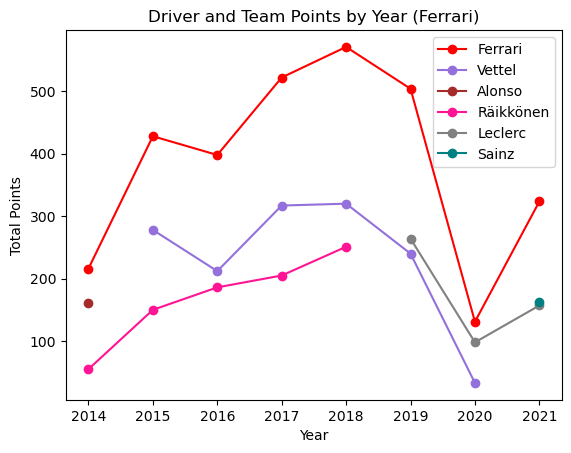

In [26]:
plt.figure
plt.plot(ct_stand_years_names_vets_points_ferr['year'],ct_stand_years_names_vets_points_ferr['points'],marker='o',label='Ferrari',color='red')
plt.plot(drivers[4].index[1:-1],drivers[4][1:-1], marker='o',label=res_drv_top[4], color='mediumpurple')
plt.plot(res_recent_drv_greats_ferr[0].index[0],res_recent_drv_greats_ferr[0].iloc[0],label='Alonso',marker='o',color='brown')
plt.plot(res_recent_drv_greats_ferr[1].index[0:5],res_recent_drv_greats_ferr[1].iloc[0:5],label='Räikkönen',marker='o', color='deeppink')
plt.plot(res_recent_drv_greats_ferr[2].index[1:],res_recent_drv_greats_ferr[2].iloc[1:],label='Leclerc',marker='o', color='grey')
plt.plot(res_recent_drv_greats_ferr[3].index[-1],res_recent_drv_greats_ferr[3].iloc[-1],label='Sainz',marker='o', color='teal')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Driver and Team Points by Year (Ferrari)')
plt.legend()

Text(0.5, 0, 'Year')

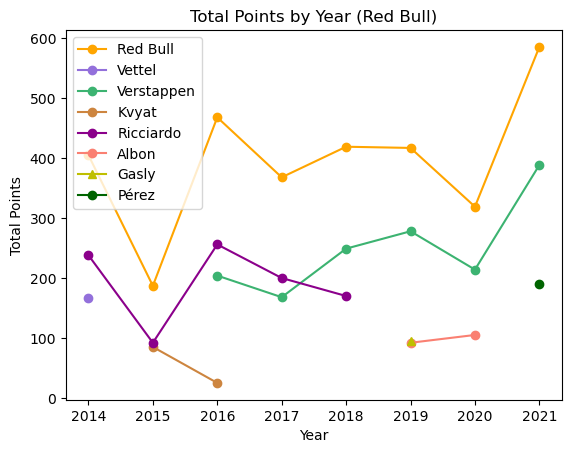

In [27]:
plt.figure()
plt.plot(ct_stand_years_names_vets_points_RB['year'],ct_stand_years_names_vets_points_RB['points'],marker='o',label='Red Bull',color='orange')
plt.plot(drivers[4].index[0],drivers[4].iloc[0], marker='o',label=res_drv_top[4], color='mediumpurple')
plt.plot(drivers[2].index[1:], drivers[2].iloc[1:], marker='o',label=res_drv_top[2], color='mediumseagreen')
plt.plot(res_recent_drv_greats_ferr[4].index[1:3],res_recent_drv_greats_ferr[4].iloc[1:3],label='Kvyat',marker='o', color='peru')
plt.plot(res_recent_drv_greats_ferr[5].index[0:5],res_recent_drv_greats_ferr[5].iloc[0:5],label='Ricciardo',marker='o', color='darkmagenta')
plt.plot(res_recent_drv_greats_ferr[7].index,res_recent_drv_greats_ferr[7],label='Albon',marker='o', color='salmon')
plt.plot(res_recent_drv_greats_ferr[6].index[2],res_recent_drv_greats_ferr[6].iloc[2],label='Gasly',marker='^',color='y')

plt.plot(res_recent_drv_greats_ferr[8].index[-1],res_recent_drv_greats_ferr[8].iloc[-1],label='Pérez',marker='o', color='darkgreen')
plt.legend()
plt.ylabel('Total Points')
plt.title('Total Points by Year (Red Bull)')
plt.xlabel('Year')